# Exploratory Data Analysis
In this notebook the COVID-19 data set is taken through some exploratory data analysis to identify first correlations and/or colinearities. A number of models will be tested for later application on the main question: whether there are population indicators that make a nation more vulderable to the virus than others.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(os.getcwd())

/Users/lisahw/Documents/Courses and Conferences/DataScience/MyProject/Capstone_02/Springboard/notebooks


### Load the data

In [9]:
df_cov = pd.read_csv('../data/interim/COVID_base.csv') 
# this data frame contains COVID-19 and all population data for countries for which COVID-19 statistics exist
df_cov.drop(df_cov.columns[0],axis=1,inplace=True)
df_cov.head()

,Country,Confirmed,Deaths,Recovered,Active,Cardio Death Rate,Diabetes Percentage,Obesity,Undernourished,PopMale,PopFemale,PopTotal,Total Population
0,US,1309550,78795,0,1230755,0.151089,10.79,37.3,1.0,2.812048,3.923944,6.735992,329064.917
1,Canada,68918,4823,0,64095,0.105599,7.37,31.3,1.0,3.159014,4.289525,7.448540,37411.038
2,United Kingdom,216525,31662,1001,183862,0.122137,4.28,29.5,1.0,3.676556,4.856698,8.533254,67530.161
3,China,83990,4637,79127,226,0.261899,9.74,6.6,8.5,1.555179,2.048110,3.603289,1433783.692
4,Netherlands,42581,5441,149,36991,0.109361,5.29,23.1,1.0,3.546222,4.785875,8.332098,17097.123


### Check out typical characteristics

In [10]:
df_cov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,147.0,26864.156463,115397.280543,8.000000,323.000000,1733.000000,10506.000000,1.309550e+06
Deaths,147.0,1894.163265,8034.918513,0.000000,8.000000,44.000000,302.000000,7.879500e+04
Recovered,147.0,7549.863946,22485.344459,0.000000,99.000000,658.000000,2759.500000,1.433000e+05
Active,147.0,17420.129252,103870.224005,0.000000,133.000000,613.000000,5101.500000,1.230755e+06
Cardio Death Rate,147.0,0.256981,0.119594,0.079370,0.162807,0.243811,0.324205,7.244167e-01
Diabetes Percentage,147.0,7.303469,3.760702,0.990000,4.800000,6.930000,9.030000,2.202000e+01
Obesity,147.0,18.534694,9.416538,2.100000,8.200000,21.900000,25.700000,3.730000e+01
Undernourished,147.0,10.653061,12.095308,1.000000,1.000000,6.500000,14.600000,5.960000e+01
PopMale,147.0,1.552883,1.258690,0.185446,0.461343,1.098134,2.546442,5.512896e+00
PopFemale,147.0,2.386105,2.062953,0.095829,0.663079,1.577732,3.994760,8.528817e+00


The COVID-19 data shows a high standard deviation with extreme maximum values beyond the 75-percentile. The percentages in cardio death rate, diabetes and obesity have a 50% standard deviation compared to the mean. Other characteristics, like undernourishment and population structure, again show a high variability between nations.

### Rewrite COVID-19 data as percentage of population 
Since all other values are relative to the population size, the COVID-19 statistics should be too.

In [29]:
print('The extreme outlier(s) is/are: ',(df_cov['Country'].loc[df_cov['Confirmed']>=0.75*np.max(df_cov['Confirmed'])].values[:]))

The extreme outlier(s) is/are:  ['US']


In [34]:
for key in ['Confirmed', 'Deaths','Recovered','Active']:
    df_cov[key] = df_cov[key]/df_cov['Total Population']

In [35]:
df_cov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,147.0,0.735843,1.182365,0.001166,0.038483,0.162043,1.015051,6.296591e+00
Deaths,147.0,0.041816,0.110309,0.000000,0.001054,0.004174,0.023820,7.436310e-01
Recovered,147.0,0.344882,0.818411,0.000000,0.011640,0.054654,0.289457,5.765514e+00
Active,147.0,0.349145,0.620733,0.000000,0.014936,0.074586,0.321396,3.740159e+00
Cardio Death Rate,147.0,0.256981,0.119594,0.079370,0.162807,0.243811,0.324205,7.244167e-01
Diabetes Percentage,147.0,7.303469,3.760702,0.990000,4.800000,6.930000,9.030000,2.202000e+01
Obesity,147.0,18.534694,9.416538,2.100000,8.200000,21.900000,25.700000,3.730000e+01
Undernourished,147.0,10.653061,12.095308,1.000000,1.000000,6.500000,14.600000,5.960000e+01
PopMale,147.0,1.552883,1.258690,0.185446,0.461343,1.098134,2.546442,5.512896e+00
PopFemale,147.0,2.386105,2.062953,0.095829,0.663079,1.577732,3.994760,8.528817e+00


### Plot the histogram

/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/lisahw/anaconda3/lib/python3.7/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30c29390>,
      dtype=object)

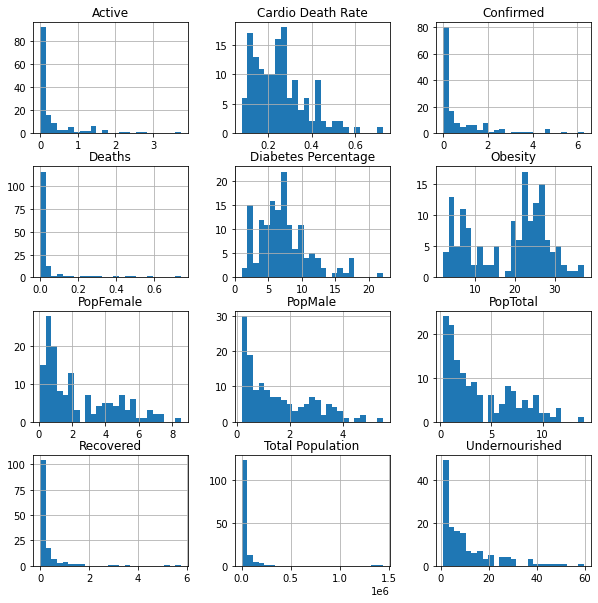

In [36]:
df_cov.hist(bins=25, figsize=(10,10))

Except for the percentage of diabetes patients, all other data seems to be Poisson-distributed. Population demographics could be covariant, which needs to be kept in mind for the modeling. Interestingly, Obesity shows two peaks.

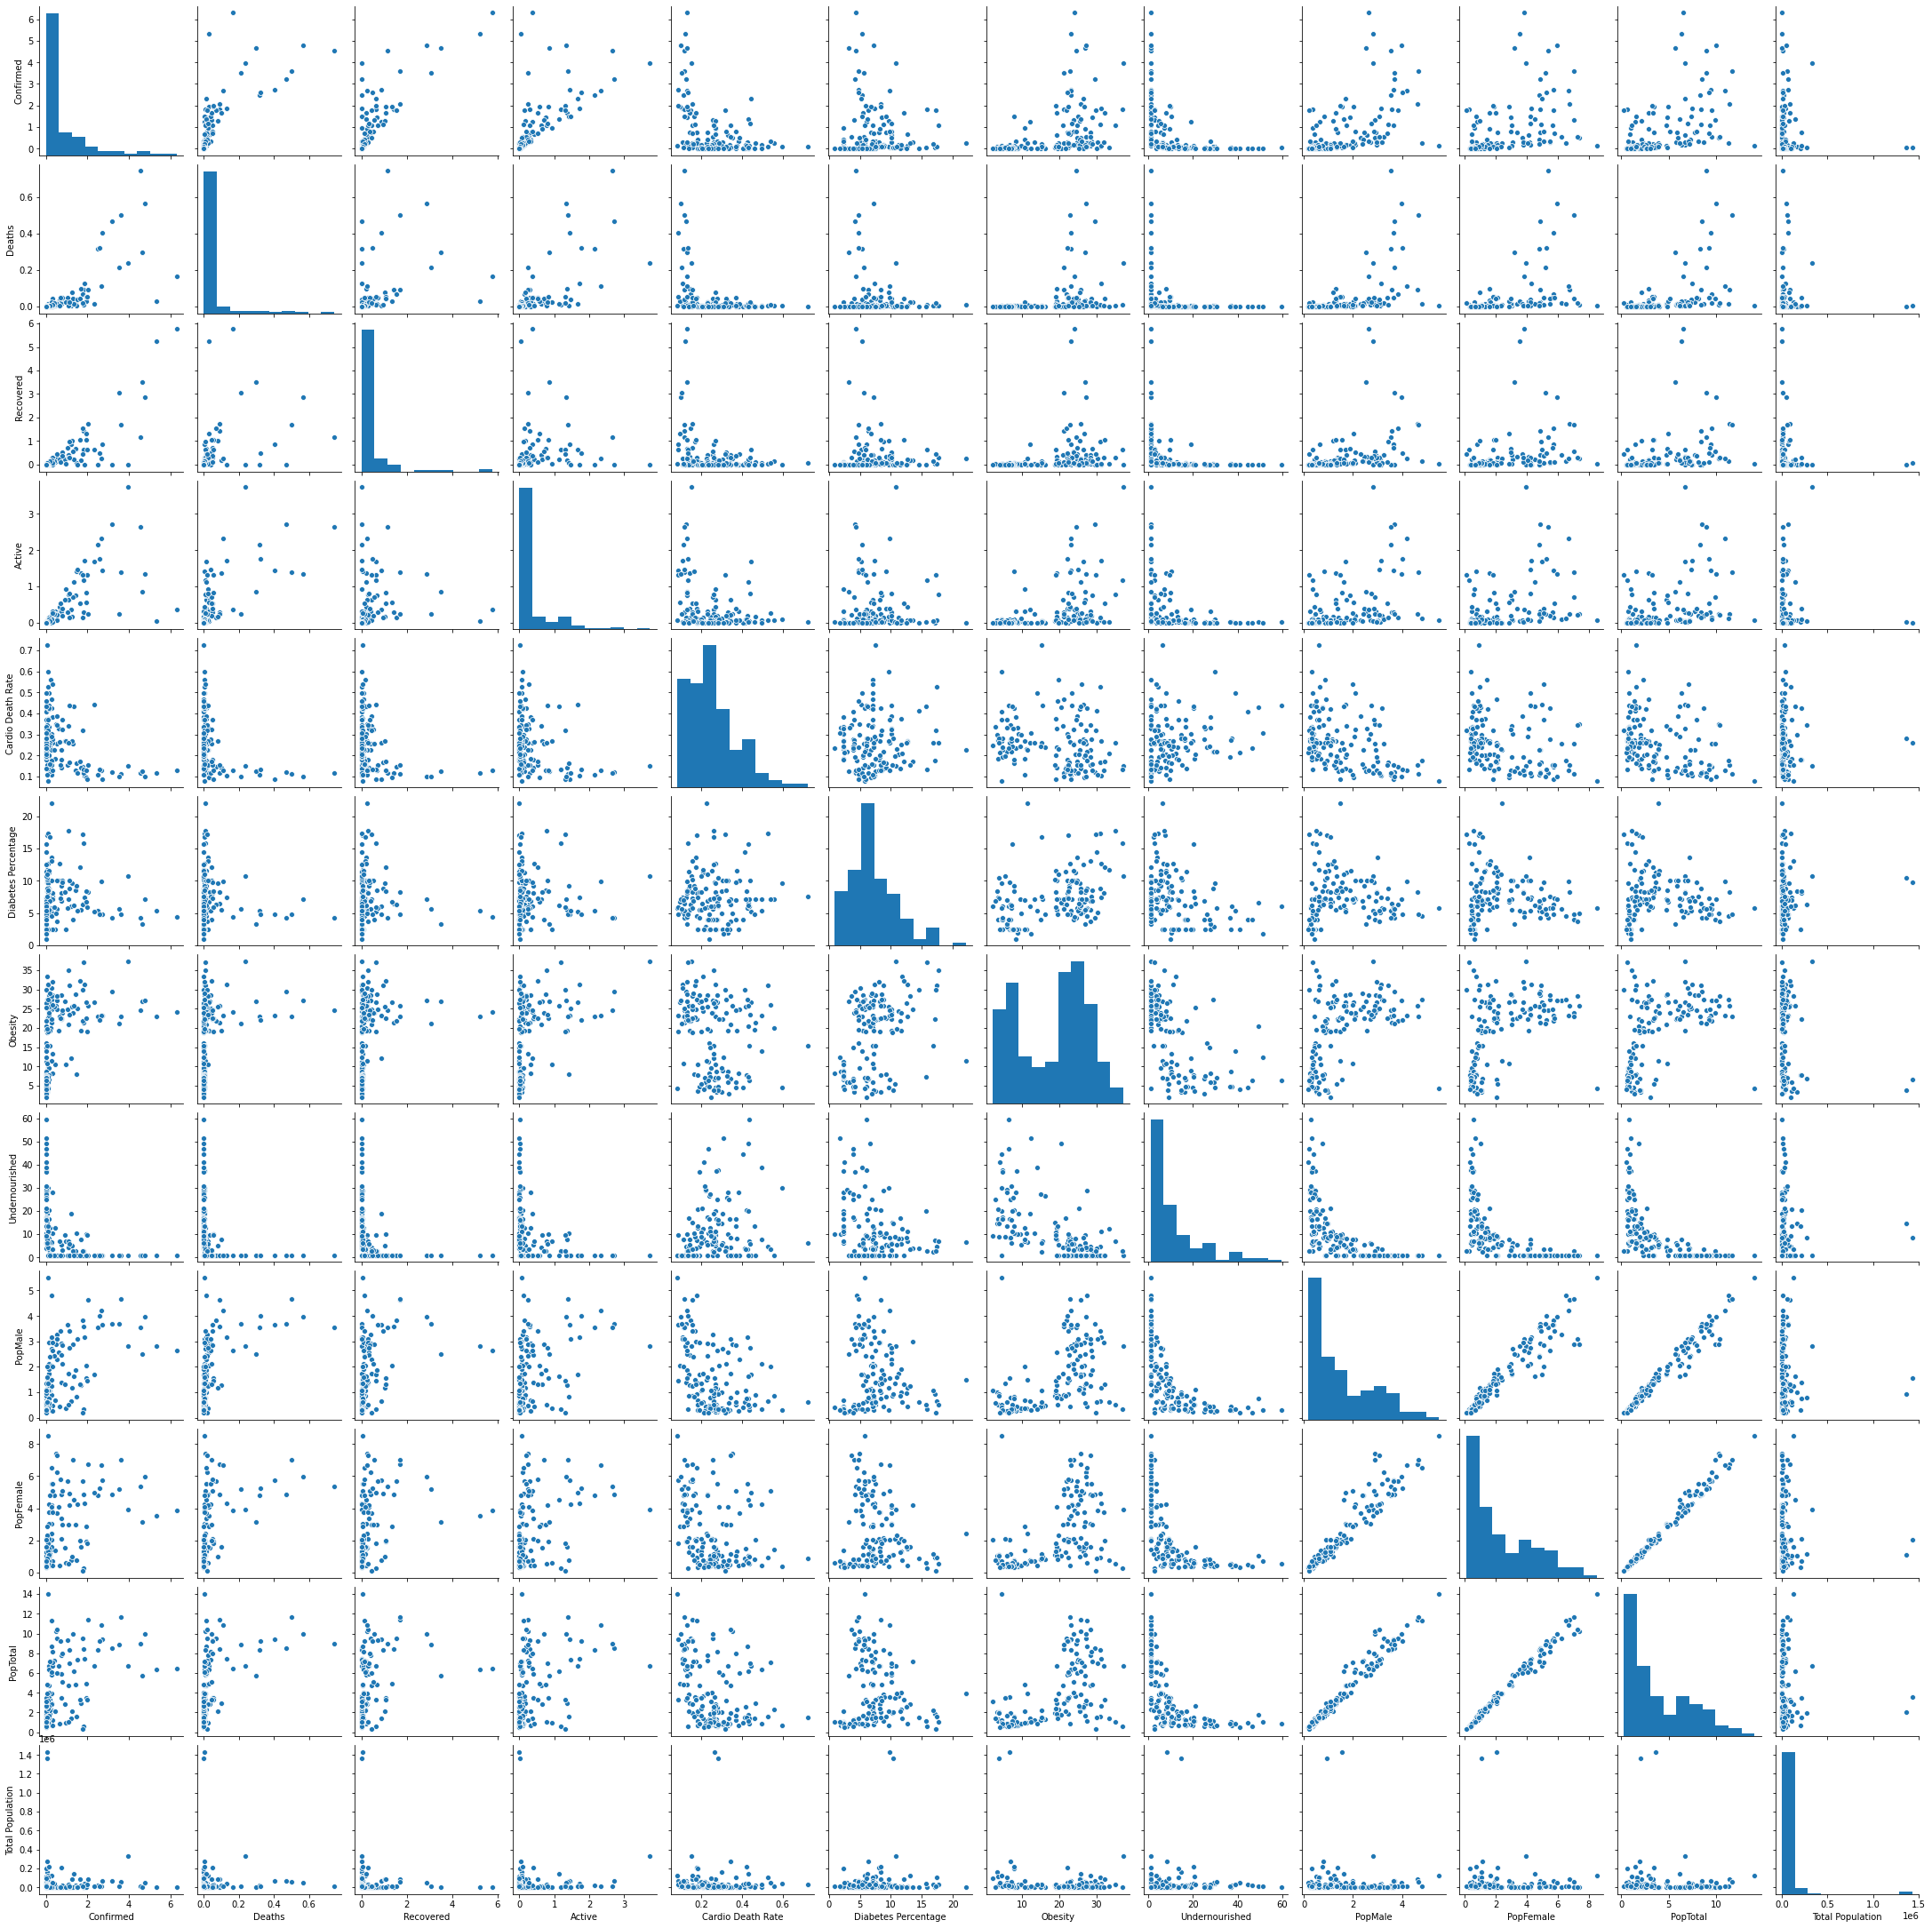

In [37]:
sns.pairplot(df_cov)

Before the division with the population, the pairplot showed an extreme outlier in the confirmed cases (US). This is now not as obvious anymore. Instead the COVID-19 numbers seem to correlate. Also, undernourishment shows an exponantial decrease. Furthermore, the population percentages are strongly correlated.

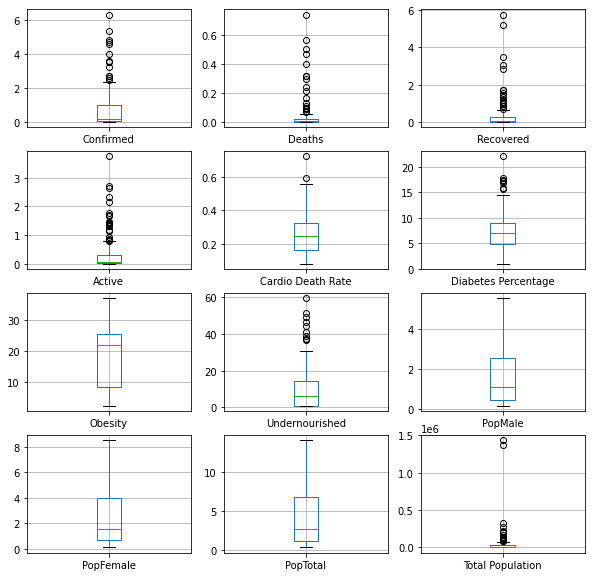

In [50]:
plt.figure(figsize=(10,10))
for key,k in zip(df_cov.columns,range(0,13)):
    if key == 'Country':
        continue
    plt.subplot(4,3,k)
    df_cov.boxplot(column=key)

The COVID-19 data has many outliers and it needs to be decided, whether the data should be cleaned from the outliers and if so how. First, the data should be clustered without covariant values like choosing only one of the COVID-19 indicators or excluding PopMale and PopFemale using only PopTotal.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text major ticklabel objects>)

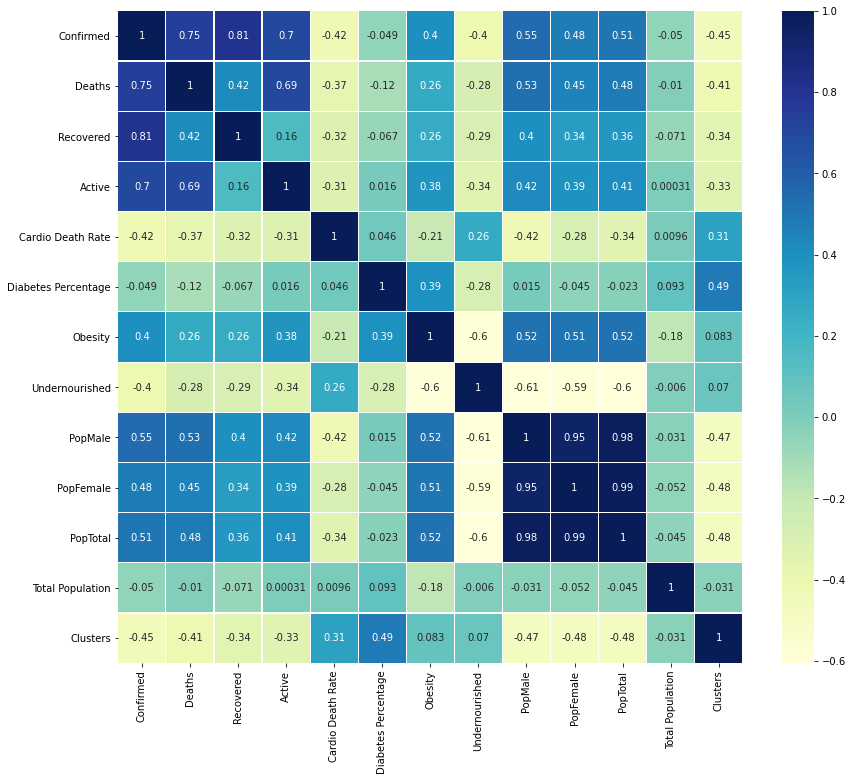

In [83]:
plt.figure(figsize=(14,12))
sns.heatmap(df_cov.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":5}) 
plt.yticks(rotation=0)

As seen above, the COVID-19 data set is in itself highly correlated. Also the population demographics. What becomes clear here is that the undernourishment courve is correlated to the demographics. This is most likely due to undernourishment being a negatively correlated indicator for wealth and health of a nation. And the healthier and richer a nation is, the higher becomes the proportion of older people in a population.

### Kernel density distribution

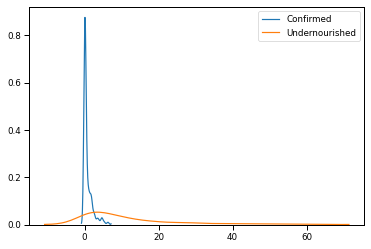

In [88]:
sns.kdeplot(df_cov.Confirmed)
sns.kdeplot(df_cov.Undernourished)

### Test the data set for clusters
1) First use the ellbow test to identify the needed number of clusters 

2) To do the ellbow test, use normalized data

3) Analyze the nature of the clusters in context of the COVID-19 data

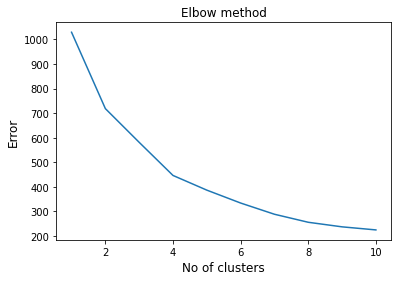

In [71]:
dftemp = df_cov.drop(columns=['Deaths','Recovered','Active','Country','PopMale','PopFemale','Clusters'])
# normalized_df=(dftemp-dftemp.min())/(dftemp.max()-dftemp.min())
# x = normalized_df.values #
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftemp.values)
# print(scaler.mean_)
normalized_df = scaler.transform(dftemp.values)
x = normalized_df
# normalized_df.head()


Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method',fontsize=12)
plt.xlabel('No of clusters',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.show()

(3, 7)


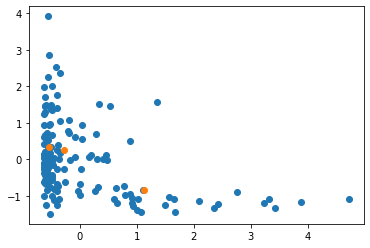

In [81]:
from sklearn.cluster import KMeans
# dftemp = df_cov.drop(columns=['Country','PopMale','PopFemale'])
# normalized_df=(dftemp-dftemp.min())/(dftemp.max()-dftemp.min())
# # normalized_df.head()
# x = normalized_df.values #
# x = dftemp.values
normalized_df = scaler.transform(dftemp.values)
x = normalized_df

kmeans = KMeans(n_clusters = 3).fit(x)
centroids = kmeans.cluster_centers_
print(centroids.shape)

plt.scatter(x[:,0],x[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1])

In [63]:
df_cov['Clusters'] = kmeans.predict(x)

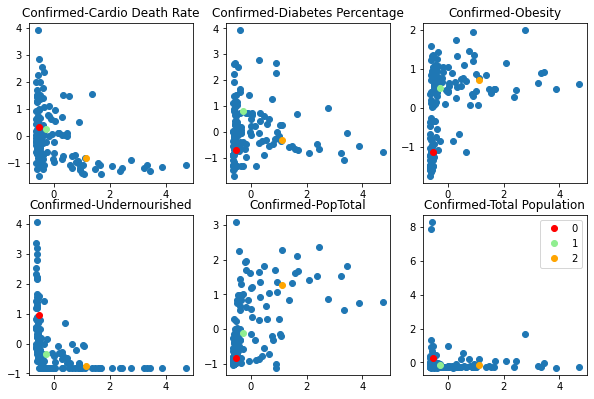

In [82]:
col = ['r','lightgreen','orange']
plt.figure(figsize=(10,10))
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.scatter(x[:,0],x[:,i])
    for j in range(3):
        plt.plot(centroids[j, 0], centroids[j, i],'o',color= col[j],label=str(j))
    plt.title('{}-{}'.format(dftemp.columns[0],dftemp.columns[i]))
plt.legend()

The clustering shows that for the confirmed cases, the cluster 0 and 2 are the most distinct. Cluster 2 incorporates the countries with the most cases.

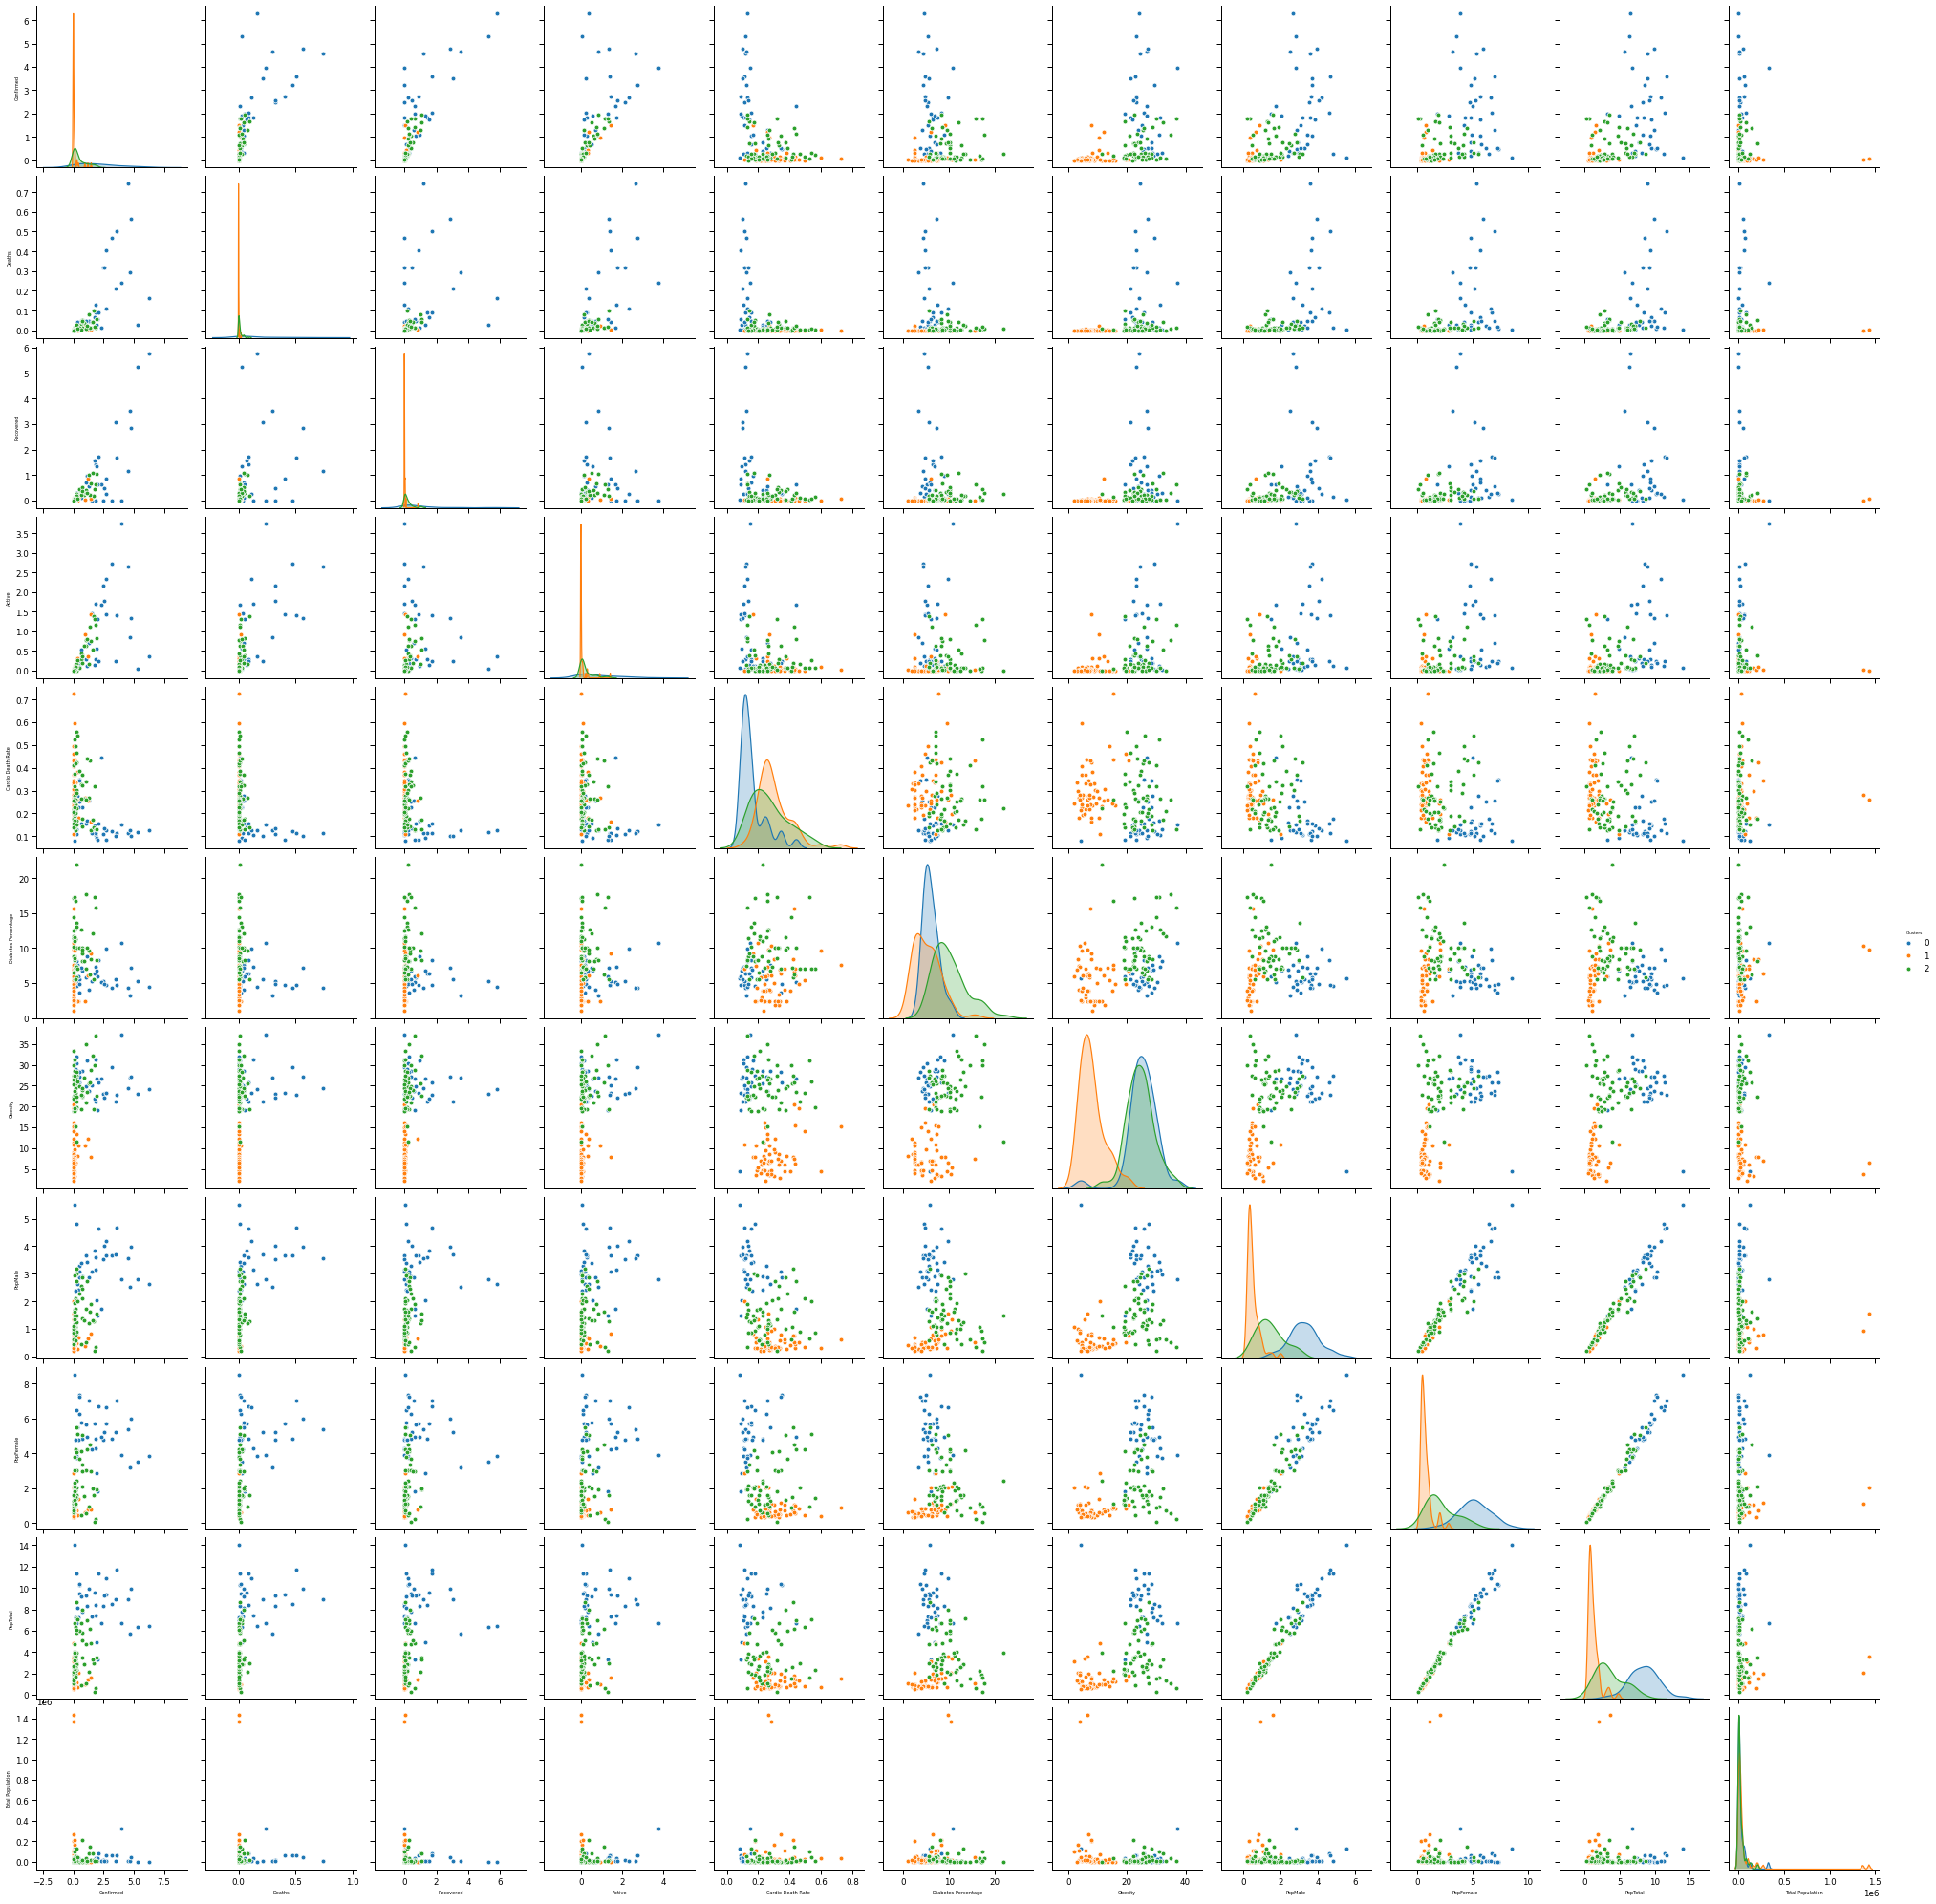

In [95]:
df_temp = df_cov.drop('Undernourished',axis=1)
sns.pairplot(df_temp,hue='Clusters')

The above graph shows that there is a likelihood that the response to COVID-19 might be a question of wealth. BUT, the data above is based on COVID-19 statistics from May 9, 2020. By now, COVID-19 has, unfortunately, spread also to less developed countries. It might therefore be interesting to compare statistics with more up-to date numbers.

### Save data including cluster

In [96]:
df_cov.to_csv('../data/interim/COVID_cluster.csv')